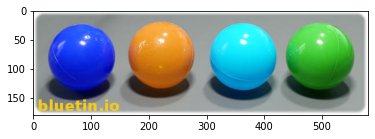

In [166]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("balls-red-blue-yellow-green.jpg", cv2.IMREAD_COLOR)
plt.imshow(image)
plt.show()


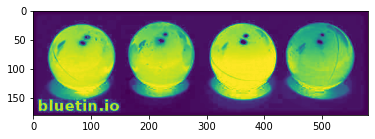

In [167]:
# converting to hsv colourspace and extracting only the saturation layer
sat = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:, :, 1]

plt.imshow(sat)
plt.show()


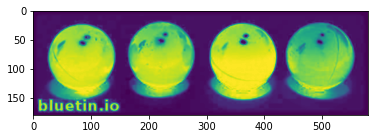

In [168]:
# applying Gaussian Blur to smoothen out rough edges and reduce noise
blur = cv2.GaussianBlur(sat, (3, 3), 0)

plt.imshow(blur)
plt.show()


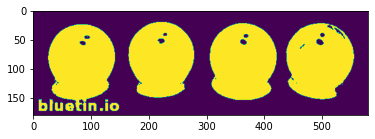

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [169]:
# applying thresholding to get a binary image with only the regions of interest
thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)[1]

plt.imshow(thresh)
plt.show()

print(thresh)


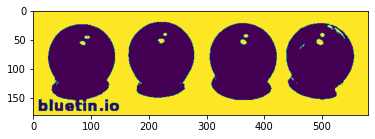

In [170]:
# creating a mask
mask = 255 - cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)[1]

plt.imshow(mask)
plt.show()


## Theory

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation.

### Erosion

All the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises, detach two connected objects etc.

### Dilation

It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

## Opening and Closing

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()  
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

[Source](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

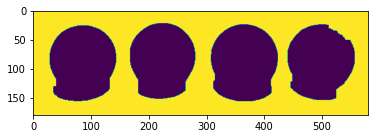

In [171]:
kernel = np.ones((10, 10), np.uint8)
# closing - dilation then erosion
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

kernel = np.ones((12, 12), np.uint8)
# opening - erosion then dilation
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)


plt.imshow(mask)
plt.show()


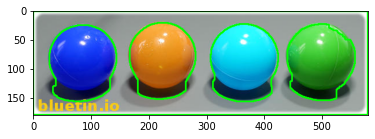

In [172]:
# finding contours
cntrs = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

image_c = image.copy()
cv2.drawContours(image_c, cntrs, -1, (0, 255, 0), 2)

plt.imshow(image_c)
plt.show()


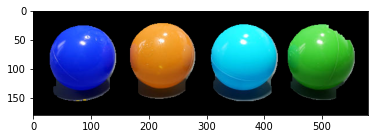

In [174]:
# applying mask and extracting the detected objects
masked = cv2.bitwise_and(image, image, mask=mask)

detected = image - masked
plt.imshow(detected)
plt.show()
